A shape: (30, 30)
U shape: (30, 30), eigenvalues: 30
V shape: (30, 30), eigenvalues: 30


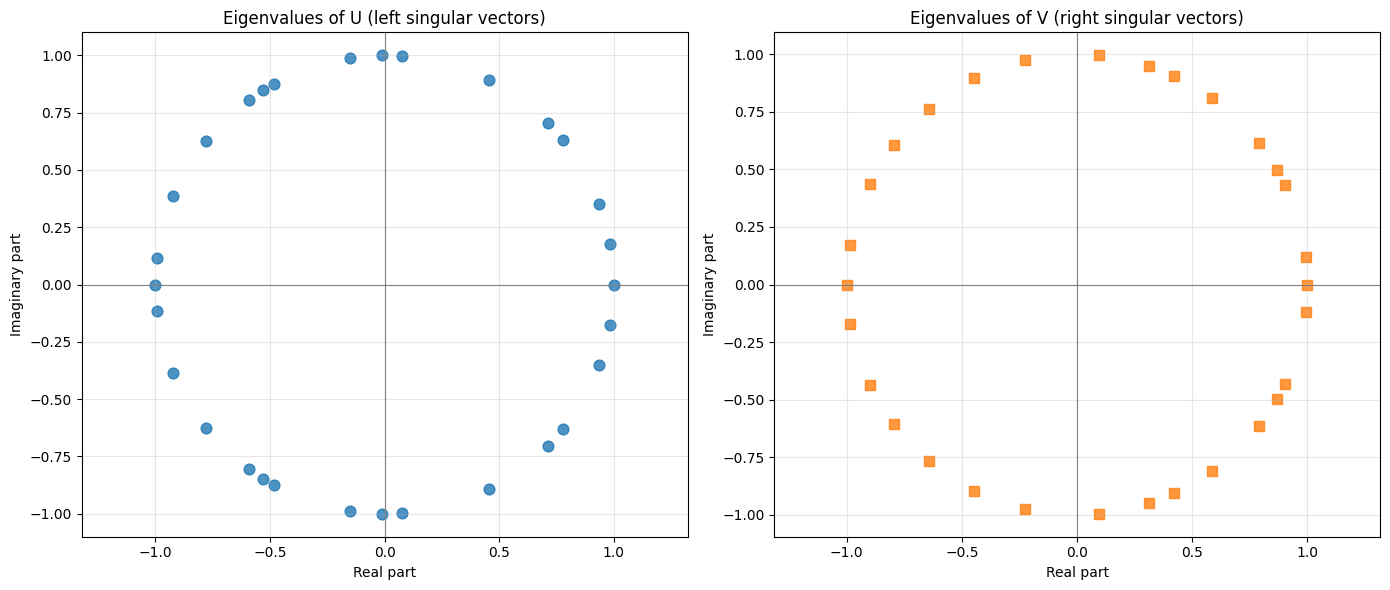

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# 8) SVD eigenvalue analysis: eigenvalues of U and V matrices
# Re-initialize A as a fresh 30x30 random matrix
n = 30
A = np.random.randn(n, n)



# Perform SVD: A = U S V^T
U, S, VT = np.linalg.svd(A, full_matrices=True)
V = VT.T

# Compute eigenvalues of U and V
eig_U = np.linalg.eigvals(U)
eig_V = np.linalg.eigvals(V)

print(f"A shape: {A.shape}")
print(f"U shape: {U.shape}, eigenvalues: {eig_U.shape[0]}")
print(f"V shape: {V.shape}, eigenvalues: {eig_V.shape[0]}")

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot eigenvalues of U
ax1.scatter(eig_U.real, eig_U.imag, s=60, alpha=0.8, color="tab:blue", marker="o")
ax1.axhline(0, color="gray", linewidth=0.8)
ax1.axvline(0, color="gray", linewidth=0.8)
ax1.set_xlabel("Real part")
ax1.set_ylabel("Imaginary part")
ax1.set_title("Eigenvalues of U (left singular vectors)")
ax1.grid(True, alpha=0.3)
ax1.axis("equal")

# Plot eigenvalues of V
ax2.scatter(eig_V.real, eig_V.imag, s=60, alpha=0.8, color="tab:orange", marker="s")
ax2.axhline(0, color="gray", linewidth=0.8)
ax2.axvline(0, color="gray", linewidth=0.8)
ax2.set_xlabel("Real part")
ax2.set_ylabel("Imaginary part")
ax2.set_title("Eigenvalues of V (right singular vectors)")
ax2.grid(True, alpha=0.3)
ax2.axis("equal")

plt.tight_layout()
plt.show()

In SVD: A = UΣV^T 


The eigenvalues of U and V (the left and right singular vectors) have a specific geometric interpretation:

- The eigen values lie on the unit circle in the complex plane (magnitued = 1)
- V^T: rotation in input space
- Σ: stretching along axes (singular values)
- U: rotation in output space

Sigma shape: (30, 30)
Number of eigenvalues: 30
First 5 eigenvalues: [10.69254697  9.63235547  9.2387206   8.62058259  8.16990806]
zero - sigma values = none


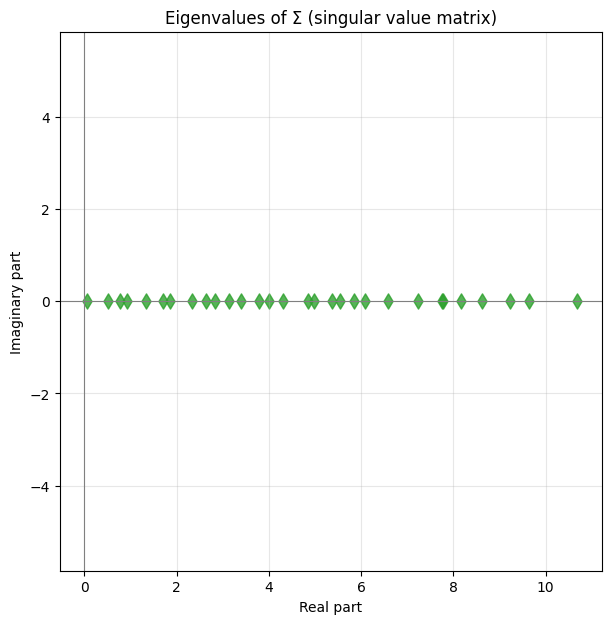

In [4]:
# Eigenvalues of Sigma (diagonal matrix of singular values)
import numpy as np
import matplotlib.pyplot as plt

# Construct full diagonal matrix Sigma from singular values
Sigma = np.diag(S)

# Compute eigenvalues of Sigma
eig_Sigma = np.linalg.eigvals(Sigma)

print(f"Sigma shape: {Sigma.shape}")
print(f"Number of eigenvalues: {eig_Sigma.shape[0]}")
print(f"First 5 eigenvalues: {eig_Sigma[:5]}")

# Print zero singular/eigen values of Sigma (if any)
tol = 1e-12
zero_sigma = eig_Sigma[np.isclose(eig_Sigma, 0.0, atol=tol)]

if zero_sigma.size > 0:
    print("zero - sigma values =", zero_sigma)
else:
    print("zero - sigma values = none")

# Plot eigenvalues of Sigma on the complex plane
plt.figure(figsize=(7, 7))
plt.scatter(eig_Sigma.real, eig_Sigma.imag, s=60, alpha=0.8, color="tab:green", marker="d")
plt.axhline(0, color="gray", linewidth=0.8)
plt.axvline(0, color="gray", linewidth=0.8)
plt.xlabel("Real part")
plt.ylabel("Imaginary part")
plt.title("Eigenvalues of Σ (singular value matrix)")
plt.grid(True, alpha=0.3)
plt.axis("equal")
plt.show()

**Geometric interpretation of eigenvalues of Σ:**

Since Σ is a diagonal matrix, its eigenvalues are simply the **singular values** themselves (the diagonal entries).

- They represent **scaling factors** along the principal axes of the transformation
- All eigenvalues are **real and non-negative** (lie on the positive real axis)
- The **largest singular value** = maximum stretching factor
- The **smallest singular value** = minimum stretching factor
- If any singular value is **zero**, the matrix is rank-deficient (collapses some dimension)

Unlike U and V (which are pure rotations with eigenvalues on the unit circle), Σ captures the **stretching/compression** part of the linear transformation defined by A.